# **📌 Loan Status Prediction Using ANN (TensorFlow & Keras)**
This project demonstrates how to use **Artificial Neural Networks (ANNs) in TensorFlow and Keras** to predict **loan status** based on applicant details.


In [1]:
## **🔹 Step 1: Install Required Libraries**

pip install tensorflow pandas scikit-learn matplotlib


SyntaxError: invalid syntax (3113574894.py, line 3)

## **🔹 Step 2: Load and Preprocess Data**

In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load dataset
df = pd.read_csv("loan_data.csv")

In [4]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
# Selecting relevant features
X = df[["ApplicantIncome", "CoapplicantIncome", "Loan_Amount_Term", "Credit_History"]]
y = df["Loan_Status"]

# Handle missing values
X.fillna(X.mean(), inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_18576\379717414.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)


In [6]:
# Encode Loan_Status (Target Variable)
encoder = LabelEncoder()
y = encoder.fit_transform(y)  # Convert 'Y'/'N' to 1/0

In [7]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## **🔹 Step 3: Build the ANN Model**

In [9]:
# Define the ANN model
model = keras.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')  # Output layer (binary classification)
])

c:\Users\hp\.conda\envs\dl\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [12]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=16, validation_data=(X_test, y_test))

Epoch 1/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.7946 - loss: 0.4756 - val_accuracy: 0.7886 - val_loss: 0.4821
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8312 - loss: 0.4406 - val_accuracy: 0.7886 - val_loss: 0.4843
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7621 - loss: 0.5371 - val_accuracy: 0.7886 - val_loss: 0.4856
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7989 - loss: 0.4822 - val_accuracy: 0.7886 - val_loss: 0.4886
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8255 - loss: 0.4371 - val_accuracy: 0.7886 - val_loss: 0.4897
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8255 - loss: 0.4396 - val_accuracy: 0.7886 - val_loss: 0.4912
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8085 - loss: 0.4751 - val_accuracy: 0.7805 - val_loss: 0.4935
Epoch 8/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8088 - loss: 0.4613 - val_accuracy: 0.7805 - v

## **🔹 Step 4: Evaluate Model Performance**

In [13]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.7851 - loss: 0.4967
Test Accuracy: 0.78


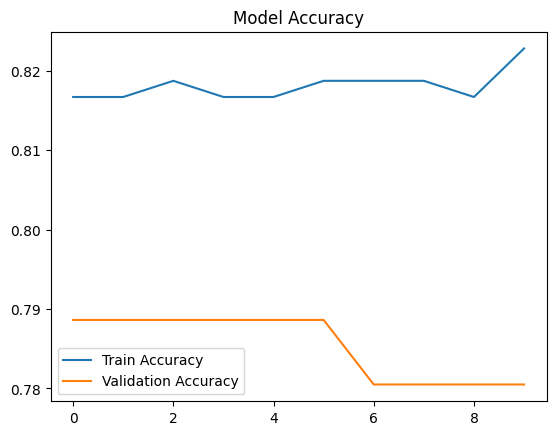

In [14]:
# Plot training history
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Model Accuracy")
plt.show()

## **🔹 Step 5: Make Predictions**

In [15]:

# Predict loan status
y_pred = (model.predict(X_test) > 0.5).astype("int32")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


In [16]:
# Compare actual vs predicted
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.flatten()})
print(results.head())

   Actual  Predicted
0       1          1
1       1          1
2       1          1
3       1          1
4       1          1


## **✅ Summary**
✔ **Preprocessed the dataset** (handled missing values, scaled features)  
✔ **Built a simple ANN using Keras** (input → hidden layers → output)  
✔ **Trained and evaluated the model** on loan status classification  
✔ **Plotted accuracy trends**  

In [3]:
pip install transformers

  Using cached regex-2024.11.6-cp312-cp312-win_amd64.whl.metadata (41 kB)
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached idna-3.10-py3-none-any.whl.metadata (10 kB)
  Using cached urllib3-2.3.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached certifi-2025.1.31-py3-none-any.whl.metadata (2.5 kB)
   ---------------------------------------- 0.0/10.2 MB ? eta -:--:--
   ------------------------------------ --- 9.2/10.2 MB 43.9 MB/s eta 0:00:01
   ---------------------------------------- 10.2/10.2 MB 35.3 MB/s eta 0:00:00
Using cached regex-2024.11.6-cp312-cp312-win_amd64.whl (273 kB)
   ---------------------------------------- 0.0/2.4 MB ? eta -:--:--
   ---------------------------------------- 2.4/2.4 MB 35.1 MB/s eta 0:00:00
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)
Using cached requests-2.32.3-py3-none-any.whl (64 kB)
Using cached certifi-2025.1.31-py3-none-any.whl (166 kB)
Using cach

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [4]:
# Use a pipeline as a high-level helper
from transformers import pipeline

messages = [
    {"role": "user", "content": "Who are you?"},
]
pipe = pipeline("text-generation", model="deepseek-ai/DeepSeek-V3-0324", trust_remote_code=True)
pipe(messages)

c:\Users\hp\.conda\envs\aienv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\hp\.conda\envs\aienv\Lib\site-packages\huggingface_hub\file_download.py:142: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\hp\.cache\huggingface\hub\models--deepseek-ai--DeepSeek-V3-0324. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mo

ImportError: Loading an FP8 quantized model requires accelerate (`pip install accelerate`)

In [ ]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForCausalLM

tokenizer = AutoTokenizer.from_pretrained("deepseek-ai/DeepSeek-V3-0324", trust_remote_code=True)
model = AutoModelForCausalLM.from_pretrained("deepseek-ai/DeepSeek-V3-0324", trust_remote_code=True)
